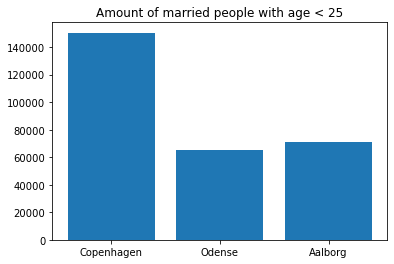

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

#Ex2.1
# Show amount of married people under age 25 in Copenhagen, Odense and Aalborg
df = pd.read_csv('EX21.csv', delimiter=';')
# Removing rows containing 'I alt'
rm = df[df['ALDER'] == 'I alt'].index
df.drop(rm, inplace=True)

ageStr = list(df['ALDER'])
age = []
for a in ageStr:
    aSplit = a.split(' ')
    age.append(int(aSplit[0]))
cities = list(df['OMRÅDE'])
data = list(df['INDHOLD'])

cphAmount = []
aalAmount = []
odeAmount = []

for i in range(len(data)):
    if 'København' in str(cities[i]):
        cphAmount.append(int(data[i]))
    elif 'Odense' in str(cities[i]):
        odeAmount.append(int(data[i]))
    else:
        aalAmount.append(int(data[i]))
d = {}
d['Copenhagen'] = int(sum(cphAmount))
d['Odense'] = int(sum(odeAmount))
d['Aalborg'] = int(sum(aalAmount))

#pd.DataFrame(d).plot(kind='bar')
plt.bar(range(len(d)), list(d.values()), align='center')
plt.xticks(range(len(d)), list(d.keys()))
plt.title('Amount of married people with age < 25')
plt.show()

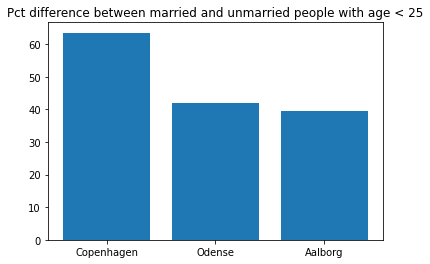

In [124]:
#Ex2.2
# Show difference between married and unmarried people under age 25 in Copenhagen, Odense and Aalborg

df = pd.read_csv('EX21.csv', delimiter=';')
# Removing rows containing 'I alt'
rm = df[df['ALDER'] == 'I alt'].index
df.drop(rm, inplace=True)
married = df
df = pd.read_csv('EX22.csv', delimiter=';')
df.drop(rm, inplace=True)
unmarried = df

ageStr = list(unmarried['ALDER'])
age = []
for a in ageStr:
    aSplit = a.split(' ')
    age.append(int(aSplit[0]))
cities = list(unmarried['OMRÅDE'])
data = list(unmarried['INDHOLD'])

cphUAmount = []
aalUAmount = []
odeUAmount = []

for i in range(len(data)):
    if 'København' in str(cities[i]):
        cphUAmount.append(int(data[i]))
    elif 'Odense' in str(cities[i]):
        odeUAmount.append(int(data[i]))
    else:
        aalUAmount.append(int(data[i]))


diffDict = {}
diffDict['Copenhagen'] = round((sum(cphUAmount)-sum(cphAmount))/sum(cphUAmount)*100, 2)
diffDict['Odense'] = round((sum(odeUAmount)-sum(odeAmount))/sum(odeUAmount)*100, 2)
diffDict['Aalborg'] = round((sum(aalUAmount)-sum(aalAmount))/sum(aalUAmount)*100, 2)
plt.bar(range(len(diffDict)), list(diffDict.values()), align='center')
plt.xticks(range(len(diffDict)), list(diffDict.keys()))
plt.title('Pct difference between married and unmarried people with age < 25')
plt.show()

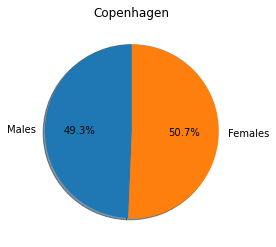

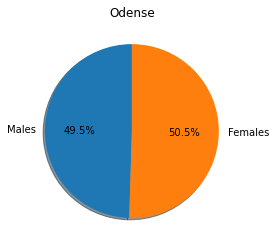

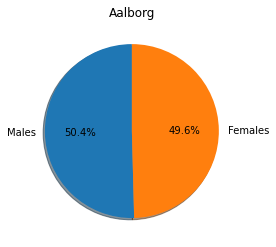

In [101]:
#Ex2.3
# Show male/female allocation in Copenhagen, Odense and Aalborg

df = pd.read_csv('EX23.csv', delimiter=';')
rm = df[df['KØN'] == 'I alt'].index
df.drop(rm, inplace=True)
data = list(df['INDHOLD'])
cities = list(df['OMRÅDE'])
genders = list(df['KØN'])

cph = {}
ode = {}
aal = {}
for i in range(len(data)):
    if str(cities[i]) == 'København':
        cph[genders[i]] = int(data[i])
    elif str(cities[i]) == 'Odense':
        ode[genders[i]] = int(data[i])
    else:
        aal[genders[i]] = int(data[i])
#cph, ode, aal

labels = 'Males', 'Females'
cphSizes = [cph['Mænd'], cph['Kvinder']]
odeSizes = [ode['Mænd'], ode['Kvinder']]
aalSizes = [aal['Mænd'], aal['Kvinder']]

plt.figure(0)
plt.title('Copenhagen')
plt.pie(cphSizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.figure(1)
plt.title('Odense')
plt.pie(odeSizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.figure(2)
plt.title('Aalborg')
plt.pie(aalSizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

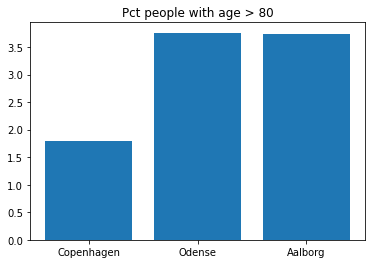

In [123]:
#Ex2.4
# Show pct of people above 80 in Copenhagen, Odense and Aalborg

df = pd.read_csv('EX24.csv', delimiter=';')
rm = df[df['ALDER'] == 'I alt'].index
df.drop(rm, inplace=True)

data = list(df['INDHOLD'])
cities = list(df['OMRÅDE'])
ageStr = list(df['ALDER'])
age = []
for a in ageStr:
    aSplit = a.split(' ')
    age.append(int(aSplit[0]))

cph = []
cphOld = []
ode = []
odeOld = []
aal = []
aalOld = []

for i in range(len(data)):
    if str(cities[i]) == 'København':
        cph.append(int(data[i]))
        if age[i] > 80:
            cphOld.append(int(data[i]))
    elif str(cities[i]) == 'Odense':
        ode.append(int(data[i]))
        if age[i] > 80:
            odeOld.append(int(data[i]))
    else:
        aal.append(int(data[i]))
        if age[i] > 80:
            aalOld.append(int(data[i]))

sum(cph), sum(ode), sum(aal), sum(cphOld), sum(odeOld), sum(aalOld)
d = {}
d['Copenhagen'] = round(sum(cphOld)/sum(cph)*100,2)
d['Odense'] = round(sum(odeOld)/sum(ode)*100,2)
d['Aalborg'] =  round(sum(aalOld)/sum(aal)*100,2)
plt.bar(range(len(d)), list(d.values()), align='center')
plt.xticks(range(len(d)), list(d.keys()))
plt.title('Pct people with age > 80')
plt.show()

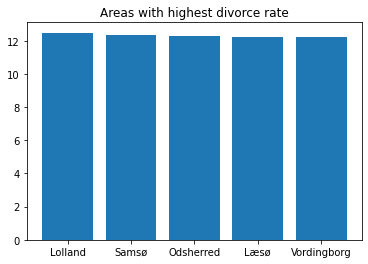

In [159]:
#Ex2.5
# Show top 5 areas with highest rate of divorce

df = pd.read_csv('EX25.csv', delimiter=';')
rm = df[df['OMRÅDE'] == 'Region Hovedstaden'].index
df.drop(rm, inplace=True)
status = list(df['CIVILSTAND'])
data = list(df['INDHOLD'])
cities = list(df['OMRÅDE'])
overall = {}
divorced = {}
for i in range(len(data)):
    if str(status[i]) == 'I alt':
        overall[cities[i]] = int(data[i])
    else:
        divorced[cities[i]] = int(data[i])

rate = {}
for i in range(len(data)):
    rate[cities[i]] = round(divorced[cities[i]]/overall[cities[i]]*100, 2)
sorted_rate = sorted(rate.items(), key=lambda kv: kv[1])
sorted_rate = sorted_rate[::-1]
top5 = dict(sorted_rate[:5])
plt.bar(range(len(top5)), list(top5.values()), align='center')
plt.xticks(range(len(top5)), list(top5.keys()))
plt.title('Areas with highest divorce rate')
plt.show()